In [ ]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

experimentalFile = "japanese.00000.wav"
cue, sampleRate = librosa.load(experimentalFile)
print("Signal",cue)
print("Sample Rate:",sampleRate)

Signal [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.6715077e-05
 -1.6902189e-04  0.0000000e+00]
Sample Rate: 22050


Text(0.5, 1.0, 'Waveform')

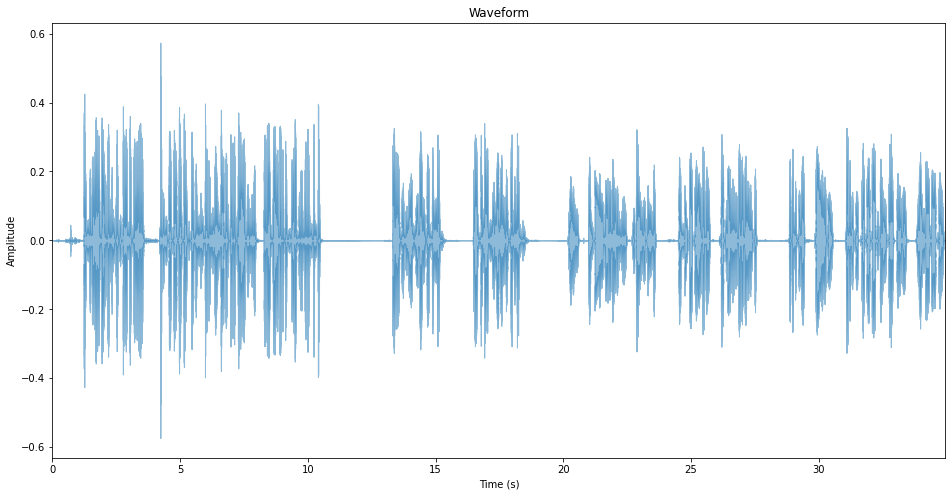

In [ ]:
# waveform plot
size = (16,8)
plt.figure(figsize=size)
librosa.display.waveplot(cue, sampleRate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

Text(0.5, 1.0, 'Power Spectrum')

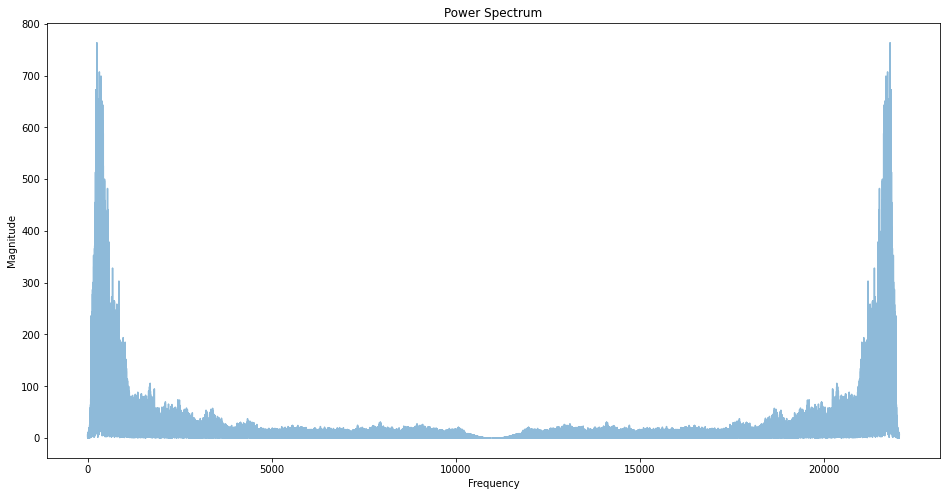

In [ ]:
# Fourier Transform (FFT) 
fft = np.fft.fft(cue)
# Claculating the magnitude using an absolute fft
magnitude = np.abs(fft)
# variable frequency for linspace
frequency = np.linspace(0, sampleRate, len(magnitude))
# Plot Spectrum
plt.figure(figsize=size)
plt.plot(frequency, magnitude, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

Text(0.5, 1.0, 'Power Spectrum')

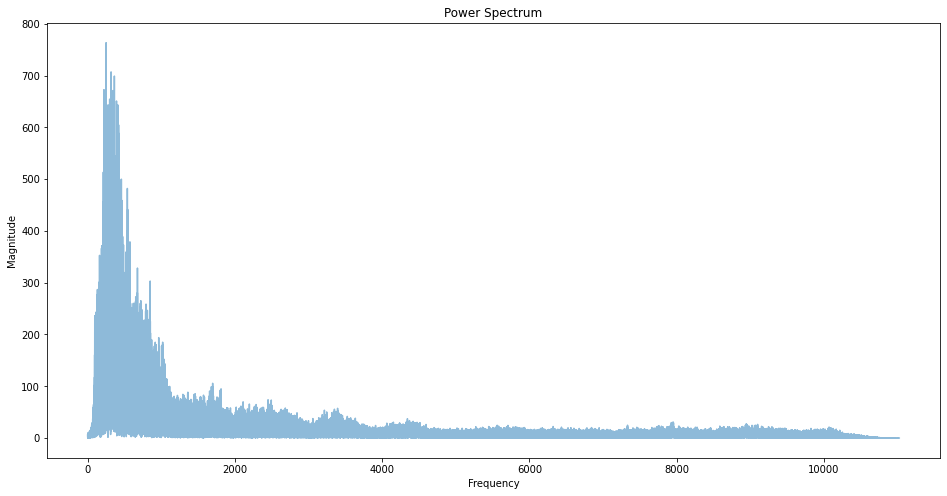

In [ ]:
# Take half of the spectrum and frequency
halfSpectrumLeft = magnitude[:int(len(magnitude)/2)]
frequencyForLeft = frequency[:int(len(magnitude)/2)]

# Plot Spectrum
plt.figure(figsize=size)
plt.plot(frequencyForLeft, halfSpectrumLeft, alpha=0.5)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power Spectrum")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'Spectrogram')

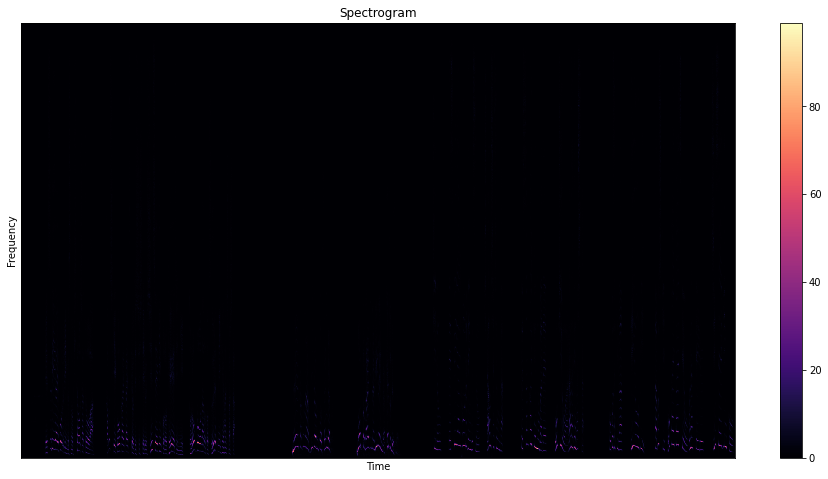

In [ ]:
# Spectrogram (STFT)
hopLength = 512
n_fft = 2048
# STFT using Librosa
stft = librosa.stft(cue, n_fft=n_fft, hop_length=hopLength)\
# TO calculate the maninute and stft must be absolute
voicegrams = np.abs(stft)
# Spectrogram Plot
plt.figure(figsize=size)
librosa.display.specshow(voicegrams, sr=sampleRate, hop_length=hopLength)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

Text(0.5, 1.0, 'Spectrogram (dB)')

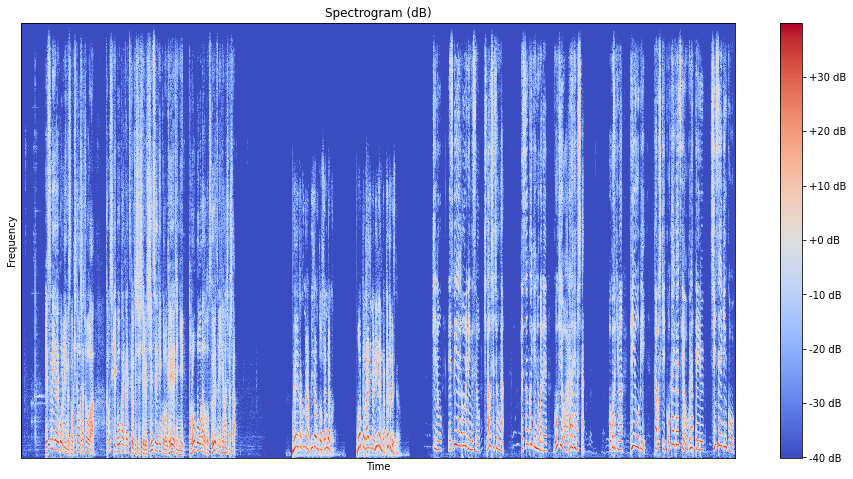

In [ ]:
# using logrithm to calculate the spectrogram 
logarithm_voicegrams = librosa.amplitude_to_db(voicegrams)
# decible of the spectrogram plot
plt.figure(figsize=size)
librosa.display.specshow(logarithm_voicegrams, sr=sampleRate, hop_length=hopLength)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

Text(0.5, 1.0, 'MFCCs')

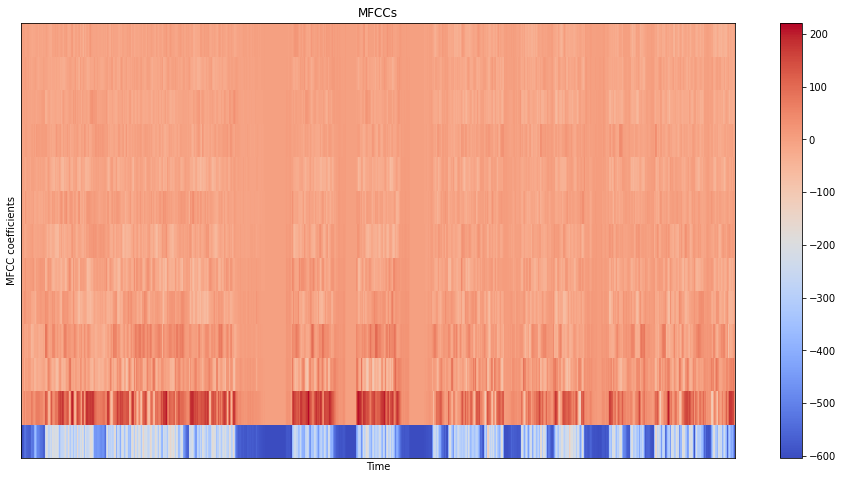

In [ ]:
# MFCCs
MFCCs = librosa.feature.mfcc(cue, sampleRate, n_fft=n_fft, hop_length=hopLength, n_mfcc=13)
# MY MFCCs plot
plt.figure(figsize=size)
librosa.display.specshow(MFCCs, sr=sampleRate, hop_length=hopLength)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

In [ ]:
import json
import os
import math
TRACK_DURATION = 30 
DATASET_PATH = "/content/drive/MyDrive/languagesDataset2"
SAMPLE_RATE = 22050
JSON_PATH = "dataLanguage.json"
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [ ]:
def saveToJsonMFCC(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):


    #for making dictionary
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samplesSegment = int(SAMPLES_PER_TRACK / num_segments)
    numSampleSSEgmentMFCCVector = math.ceil(samplesSegment / hop_length)

    # loop through all language sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # This is to ensure we process our langugae folder
        if dirpath is not dataset_path:

            # save language labels
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # In here its to process the audio
            for f in filenames:

	      	  #load our lanugage audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samplesSegment * d
                    finish = start + samplesSegment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # In here we only want mfcc feature
                    if len(mfcc) == numSampleSSEgmentMFCCVector:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [ ]:
saveToJsonMFCC(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: japanese
/content/drive/MyDrive/languagesDataset2/japanese/japanese.00020.wav, segment:1
/content/drive/MyDrive/languagesDataset2/japanese/japanese.00020.wav, segment:2
/content/drive/MyDrive/languagesDataset2/japanese/japanese.00020.wav, segment:3
/content/drive/MyDrive/languagesDataset2/japanese/japanese.00020.wav, segment:4
/content/drive/MyDrive/languagesDataset2/japanese/japanese.00020.wav, segment:5
/content/drive/MyDrive/languagesDataset2/japanese/japanese.00020.wav, segment:6
/content/drive/MyDrive/languagesDataset2/japanese/japanese.00020.wav, segment:7
/content/drive/MyDrive/languagesDataset2/japanese/japanese.00020.wav, segment:8
/content/drive/MyDrive/languagesDataset2/japanese/japanese.00020.wav, segment:9
/content/drive/MyDrive/languagesDataset2/japanese/japanese.00020.wav, segment:10
/content/drive/MyDrive/languagesDataset2/japanese/japanese.00027.wav, segment:1
/content/drive/MyDrive/languagesDataset2/japanese/japanese.00027.wav, segment:2
/content/drive/My